### SQLを使ってデータベースを扱う方法を学びます

#### はじめる前に
SQLを使ってデータベースを操作する方法は沢山あります。このセクションでは、Pythonが標準で扱えるSQLiteという形式のデータベースを扱います。他にもOracleやMySQLなど色々なデータベースがありますが、SQLを通じて扱うことが出来るという点では共通しているので、ここではSQLの基本を紹介します。

##### 基本
SQLは、Structured Query Languageの略で、データベースを操作することに特化したプログラミング言語の一種です。データベース自体にも様々な種類があります。古くから広く使われているものの1つに、表（テーブル）にデータを保存し、その表の間の関係性を定義する、RDB（Relational DataBase）があります。SQLは、この表型のデータベースを操作するための言語です。

RDBを扱うためのソフトウェアにも沢山の種類があります。RDBMS（RDB Management System)と呼ばれるこれらのソフトには、OracleやMySQL、またPostgreSQLやMicrosoftのSQLServerなどが有名ですが、SQLiteというRDBMSがPythonには標準で付属しています。

#### Step 1: SQL Alchemyのセットアップ

データベースとPandasを接続するために、SQLAlchemyが必要です。[詳しい情報はこちら](http://www.sqlalchemy.org/download.html)
すでに、import sqlalchemyとして、使えるようになっているか確認してみてください。エラーが起こる場合は、以下のいずれかの方法でインストールします。

（コマンドラインで）pip install sqlalchemy

Anacondaを使っている場合は、すでにセットアップされている可能性もありますが、コマンドラインから、次のようにします。

conda install sqlalchemy

#### Step 2: SQLite Broswerのセットアップ（必須ではありません）

SQLite形式のデータを閲覧・操作するのに便利です。

お使いのOSに応じたバージョンを用意します。 http://sqlitebrowser.org/

#### Step 3: sakilaデータベースの取得

sakilaデータベースは、レンタルビデオの情報をまとめたサンプルデータベースです。 http://dev.mysql.com/doc/sakila/en/

SQLite形式のデータを次のリンクから取得できます。[ダウンロードはこちら](https://www.dropbox.com/s/t049qmjzycrakro/sakila.db?dl=0)

本家サイトから、SQLを取得して、自分で構築することも可能です http://dev.mysql.com/doc/index-other.html
少し難易度が高いので、チャレンジしてみたい方だけおすすめします。

データベースは、ipythonを起動した場所と同じディレクトリに保存してください。

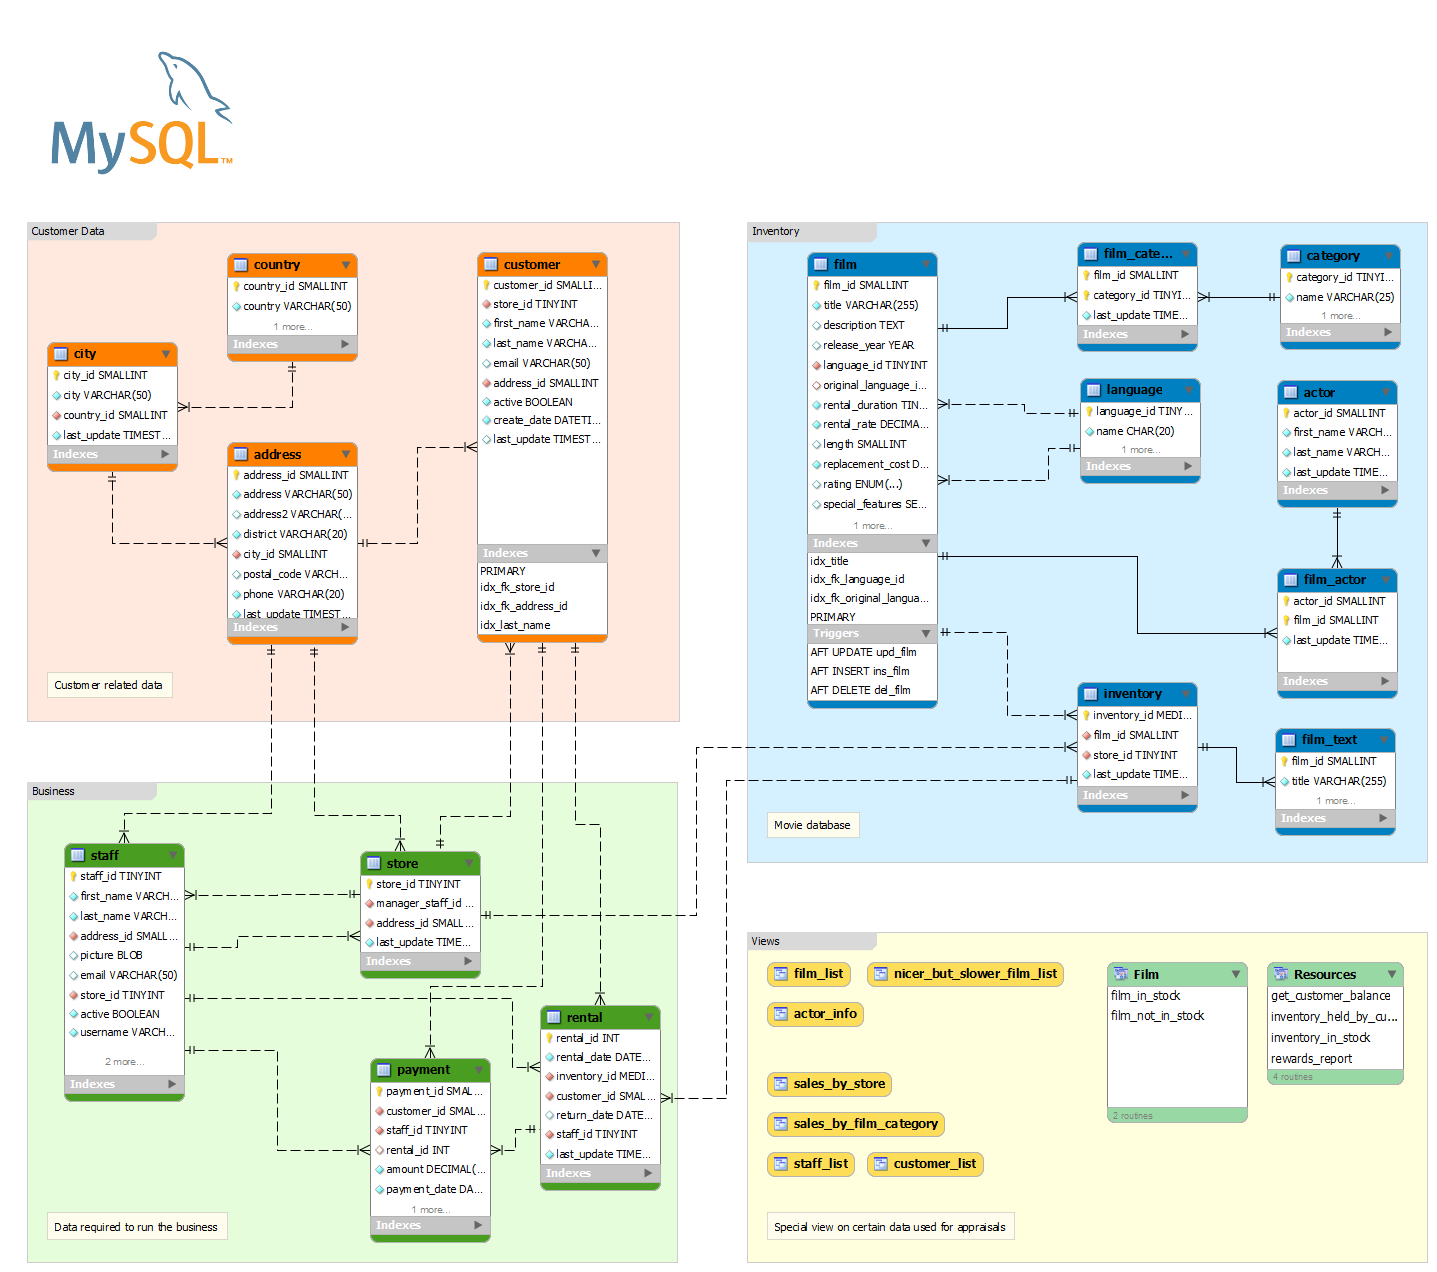

In [1]:
# sakilaデータベースのテープルと、テーブル同士の関係を示したER（Entitiy-Relationship）図です。
# SQLを試しながら説明するので、いまは全部分からなくても大丈夫です。

from IPython.display import Image
Image('sakilaerm.png')

Pythonには、SQLite3が付属しています。つまり、追加の作業無しに、SQLを使ったデータベースの操作ができるということです。pandasもデータベースからデータを読み込むことが出来ます。ただ、そのためには、SQL Alchemyがセットアップされている必要があります。

In [7]:
# インポートしてみましょう。
import sqlite3
import pandas as pd

まず、データベースと接続するために、Connectionオブジェクトを作る必要があります。
やってみましょう。

In [8]:
# sakila.dbのファイルが、このフォルダにあることを確認してください。
con = sqlite3.connect("sakila.db")

最も基本的なSQL文を実行してみます。ひとまず、接続を確認するための操作です。SQLに関する詳しい話は、次のレクチャーで触れます。

In [9]:
# SQL文を文字列として書きます。複数行になっても良いように、引用符を3つ書いておきましょう。
sql_query = ''' SELECT * FROM customer '''

# Pandasを利用します。
df = pd.read_sql(sql_query, con)

df

customer_id  store_id first_name  last_name  \
0              1         1       MARY      SMITH   
1              2         1   PATRICIA    JOHNSON   
2              3         1      LINDA   WILLIAMS   
3              4         2    BARBARA      JONES   
4              5         1  ELIZABETH      BROWN   
5              6         2   JENNIFER      DAVIS   
6              7         1      MARIA     MILLER   
7              8         2      SUSAN     WILSON   
8              9         2   MARGARET      MOORE   
9             10         1    DOROTHY     TAYLOR   
10            11         2       LISA   ANDERSON   
11            12         1      NANCY     THOMAS   
12            13         2      KAREN    JACKSON   
13            14         2      BETTY      WHITE   
14            15         1      HELEN     HARRIS   
15            16         2     SANDRA     MARTIN   
16            17         1      DONNA   THOMPSON   
17            18         2      CAROL     GARCIA   
18            19         1       RUTH   MARTINEZ   
19            20         2     SHARON   ROBINSON   
20            21         1   MICHELLE      CLARK   
21            22         1      LAURA  RODRIGUEZ   
22            23         2      SARAH      LEWIS   
23            24         2   KIMBERLY        LEE   
24            25         1    DEBORAH     WALKER   
25            26         2    JESSICA       HALL   
26            27         2    SHIRLEY      ALLEN   
27            28         1    CYNTHIA      YOUNG   
28            29         2     ANGELA  HERNANDEZ   
29            30         1    MELISSA       KING   
..           ...       ...        ...        ...   
569          570         2       IVAN   CROMWELL   
570          571         2    JOHNNIE   CHISHOLM   
571          572         1     SIDNEY   BURLESON   
572          573         1      BYRON        BOX   
573          574         2     JULIAN       VEST   
574          575         2      ISAAC    OGLESBY   
575          576         2     MORRIS   MCCARTER   
576          577         2    CLIFTON    MALCOLM   
577          578         2    WILLARD    LUMPKIN   
578          579         2      DARYL      LARUE   
579          580         1       ROSS       GREY   
580          581         1     VIRGIL    WOFFORD   
581          582         2       ANDY    VANHORN   
582          583         1   MARSHALL      THORN   
583          584         2   SALVADOR       TEEL   
584          585         1      PERRY   SWAFFORD   
585          586         1       KIRK    STCLAIR   
586          587         1     SERGIO  STANFIELD   
587          588         1     MARION     OCAMPO   
588          589         1      TRACY   HERRMANN   
589          590         2       SETH     HANNON   
590          591         1       KENT  ARSENAULT   
591          592         1   TERRANCE      ROUSH   
592          593         2       RENE  MCALISTER   
593          594         1    EDUARDO      HIATT   
594          595         1   TERRENCE  GUNDERSON   
595          596         1    ENRIQUE   FORSYTHE   
596          597         1    FREDDIE     DUGGAN   
597          598         1       WADE   DELVALLE   
598          599         2     AUSTIN    CINTRON   

                                     email  address_id active  \
0            MARY.SMITH@sakilacustomer.org           5      1   
1      PATRICIA.JOHNSON@sakilacustomer.org           6      1   
2        LINDA.WILLIAMS@sakilacustomer.org           7      1   
3         BARBARA.JONES@sakilacustomer.org           8      1   
4       ELIZABETH.BROWN@sakilacustomer.org           9      1   
5        JENNIFER.DAVIS@sakilacustomer.org          10      1   
6          MARIA.MILLER@sakilacustomer.org          11      1   
7          SUSAN.WILSON@sakilacustomer.org          12      1   
8        MARGARET.MOORE@sakilacustomer.org          13      1   
9        DOROTHY.TAYLOR@sakilacustomer.org          14      1   
10        LISA.ANDERSON@sakilacustomer.org          15      1   


エラー無く実行できれば、設定は完了しています。
次のレクチャーで、詳しいSQLの使い方を紹介します。